# Problema coloración de regiones por CSF (_Constraint Satisfaction Framework_)

Para que este algoritmo funcione, es necesario instalar el módulo `simpleai` mediante el comando `pip install simpleai`. 

In [133]:
from simpleai.search import CspProblem, backtrack
import time

# Abreviaciones departamentos
BQ = 'Barranquilla'
SD = 'Soledad'
PC = 'Puerto Colombia'
TB = 'Tubará'
GP = 'Galapa'
MB = 'Malambo'
SG = 'Sabanagrande'
BR = 'Baranoa'
PN = 'Polonuevo'
ST = 'Santo Tomás'
PV = 'Palmar de Varela'
PD = 'Ponedera'
CL = 'Candelaria'
CC = "Campo de la Cruz"
SN = 'Suán'
SU = 'Santa Lucía'
MT = 'Manatí'
RP = 'Repelón'
LR = 'Luruaco'
PJ = 'Piojó'
JA = 'Juan de Acosta'
US = 'Usiacurí'
SL = 'Sabanalarga'

# Definición de variables: "municipios"
variables = (BQ, SD, PC, TB, GP, MB, SG, BR, 
             PN, ST, PV, PD, CL, CC, SN, SU, 
             MT, RP, LR, PJ, JA, US, SL)

# Función de restricción para pares de ciudades.
def const_adj(variables, values) :
    return all(values[0] != x for x in values[1:])

restricciones = [((BQ, SD, PC, TB, GP), const_adj),
                 ((PC, BQ, TB), const_adj),
                 ((SD, BQ, MB), const_adj),
                 ((MB, BQ, SD, GP, SG, BR, PN), const_adj),
                 ((GP, BQ, SD, TB, MB, BR), const_adj),
                 ((TB, BQ, PC, GP, BR, JA), const_adj),
                 ((JA, TB, BR, PJ, US), const_adj),
                 ((PJ, LR, JA, US, SL), const_adj),
                 ((LR, RP, PJ, SL), const_adj),
                 ((RP, MT, LR, SL), const_adj),
                 ((MT, CL, CC, SU, RP, SL), const_adj),
                 ((SU, CC, SN, MT), const_adj),
                 ((SN, CC, SU), const_adj),
                 ((CC, PD, CL, MT, SN, SU), const_adj),
                 ((PD, PN, ST, PV, CL, CC, SL), const_adj),
                 ((PV, ST, PD), const_adj),
                 ((ST, SG, PN, PV), const_adj),
                 ((SG, MB, PN, ST), const_adj),
                 ((PN, MB, SG, BR, ST, PD, SL), const_adj),
                 ((BR, TB, GP, MB, PN, JA, US, SL), const_adj),
                 ((US, BR, PJ, JA, SL), const_adj),
                 ((CL, PN, CC, MT, SL), const_adj),
                 ((SL, BR, US, PJ, LR, RP, MT, CL, PD, PN), const_adj),
                ]

### Prueba con 4 colores

In [326]:
# Dominios: lista de colores a usar
colores = ['red', 'green', 'blue', 'yellow']
# Asignación de dominios a variables
dominios = {municipio: colores for municipio in variables}

# Medición del tiempo de computo
start = time.clock()
problema = CspProblem(variables, dominios, restricciones)
resultado = backtrack(problema)

print("Tiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
print("\n".join("{}: {} - {}".format(list(resultado.keys()).index(k), k, v) for k, v in resultado.items()))

Tiempo de ejecución del código CSP: 54.55052143097964
Resultado obtenido para el problema coloración por regiones con 4 colores: 
0: Barranquilla - red
1: Soledad - green
2: Puerto Colombia - green
3: Tubará - blue
4: Galapa - yellow
5: Malambo - blue
6: Sabanagrande - red
7: Baranoa - red
8: Polonuevo - green
9: Santo Tomás - blue
10: Palmar de Varela - red
11: Ponedera - yellow
12: Candelaria - red
13: Campo de la Cruz - green
14: Suán - red
15: Santa Lucía - blue
16: Manatí - yellow
17: Repelón - red
18: Luruaco - green
19: Piojó - red
20: Juan de Acosta - green
21: Usiacurí - yellow
22: Sabanalarga - blue


### Prueba con 5 colores.

Esta prueba tiene como fin analizar si el algoritmo del módulo es capaz de resolver el problema más rápido con mayor número de dominios. Desafortunadamente, el agregar un quinto color hace que el cálculo se demore muchisimo más, a tal punto que se interrumpe su ejecución por falta de respuesta del programa. 

In [211]:
# Agrega un color y realiza la prueba de nuevo
colores = ['red', 'green', 'blue', 'yellow', 'orange']
dominios = {municipio: colores for municipio in variables}

# Repite el proceso con menos colores
start = time.clock()
problema_2 = CspProblem(variables, dominios, restricciones)
resultado_2 = backtrack(problema_2)

print("\n Tiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
print("\n".join("{} - {}".format(k, v) for k, v in resultado_2.items()))

### Prueba con 3 colores.

In [336]:
# Agrega un color y realiza la prueba de nuevo
colores = ['red', 'green', 'blue']
dominios = {municipio: colores for municipio in variables}

# Repite el proceso con menos colores
start = time.clock()
problema_3 = CspProblem(variables, dominios, restricciones)
resultado_3 = backtrack(problema_2)

print("\n Tiempo de ejecución del código CSP: {}".format(time.clock() - start))
print("\033[1mResultado obtenido para el problema coloración por regiones con {} colores: \033[0m".format(len(colores)))
if resultado_3 == None :
    print("No se pudó llegar a una solución del problema")
else:
    print("\n".join("{} - {}".format(k, v) for k, v in resultado_3.items()))

### Visualización de resultados

Utilizando la libreria networkx junto a matplotlib, se hizo una gráfica de nodos para verificar si la solución es coherente con lo requerido.

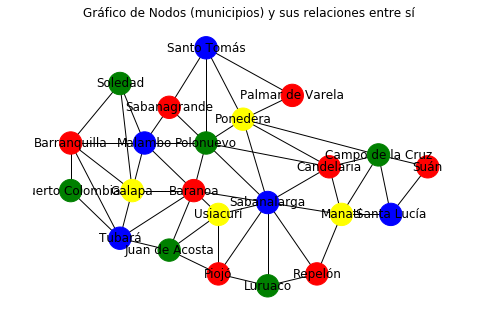

In [337]:
import plotly.plotly as py
from plotly.graph_objs import *

import networkx as nx
import matplotlib.pyplot as plt

etiqueta_mun = dict(enumerate(variables))
G=nx.Graph()

for i in range(len(etiqueta_mun)):
    G.add_node(i)

for k, v in restricciones :
    for item in k[1:] :
        G.add_edge(list(etiqueta_mun.values()).index(k[0]), list(etiqueta_mun.values()).index(item))

pos = {0: (0, 80), 1: (20, 105), 2: (0, 60), 3: (20, 40), 4: (25, 60), 
       5: (30, 80), 6: (40, 95), 7: (50, 60), 8: (55, 80), 9: (55, 120), 
       10: (90, 100), 11: (70, 90), 12: (105, 70), 13: (125, 75), 14: (145, 70), 
       15: (130, 50), 16: (110, 50), 17: (100, 25), 18: (80, 20), 19: (60, 25), 
       20: (40, 35), 21: (60, 50), 22: (80, 55)
      }

color_map = []
for node in G:
    color_map.append(resultado[etiqueta_mun[node]])

nx.draw(G, pos, node_color = color_map, labels = etiqueta_mun, node_size=500)
plt.title('Gráfico de Nodos (municipios) y sus relaciones entre sí')
plt.show()